# Impact of Social Media Usage in the Workplace

The purpose of our research project is to explore the habits of individuals and workplace policy on social media usage that impact on the productivity of members of staff.

We aim to answer the following questions:

- How much time spent on social media
- How much does social media usage in the workplace affect productivity of staff
- How much does workplace policy on social media usage play a factor in worker's social media activity
- How much does job description at work place play a factor in worker's social media activity

# Exploratory Data Analysis

Overview

Our data is formatted as paired data. Each row represents response from a respondent, where we have the following information:

- gender:
- age group:
- field of occupation:
- social media platforms:
- time spent on social media:
- devices used:
- preferred medium:
- logged in frequency:
- social media use in office: (0=no,1=yes)
- routine at work: (0=no,1=yes)
- importance to daily work life: (0=no,1=yes)
- addicted to social media: (0=no,1=yes)
- distraction at work: (0=no,1=yes)
- activities on social media:
- impact on goals: (0=no,1=yes)
- impact on general output:

In [2]:
import numpy as np 
import pandas as pd 
import plotly as pl
import cufflinks as cf
cf.go_offline()
import plotly.offline as pyo
%matplotlib inline

In [3]:
data_set = pd.read_csv('data.csv')
data_set

,Gender,Age Group,Field of Occupation,Social Media Platforms,Time Spent on Social Media,Devices Used,Preferred Medium,Logged in Frequency,Social Media Use in Office,Routine at Work,Importance to Daily Worklife,Addicted to Social Media,Distraction at Work,Activities on Social Media,Impact on Goals,Impact on general Output
0,Male,25 - 44,Employed,More than 3,2 hours and above,"Smart phones (Android,iOS,etc),Laptops","Twitter,Instagram",Occasionally,Yes,Yes,Prefer not to say,No,Yes,"Chat,Play games",Yes,Partly
1,Male,25 - 44,Freelancer,More than 3,2 hours and above,"Smart phones (Android,iOS,etc)","Facebook,Instagram,Others",Often,Yes,Yes,Yes,Yes,No,"Check Newsfeed,Chat",Yes,Greatly
2,Male,15 - 24,Employed,More than 3,2 hours and above,"Smart phones (Android,iOS,etc),Laptops",Instagram,Occasionally,Yes,Yes,Yes,Yes,Prefer not to say,"Check Newsfeed,Chat",Yes,Greatly
3,Male,25 - 44,Unemployed,More than 3,2 hours and above,"Smart phones (Android,iOS,etc)",Instagram,Often,Yes,Yes,Yes,Yes,No,Check Newsfeed,Yes,Partly
4,Male,25 - 44,Freelancer,More than 3,2 hours and above,"Smart phones (Android,iOS,etc)","Facebook,Instagram",Often,Yes,Yes,Yes,Prefer not to say,Yes,"Check Newsfeed,Chat,Others",Yes,Greatly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Male,25 - 44,Employed,3,More than 1 hour 30 minutes,"Smart phones (Android,iOS,etc)",facebook,Frequently,Yes,No,Yes,No,No,Check Newsfeed,Yes,Greatly
203,Male,25 - 44,Employed,More than 3,More than 1 hour 30 minutes,"Smart phones (Android,iOS,etc)",facebook,Frequently,Yes,No,Yes,Yes,No,Check Newsfeed,Yes,Greatly
204,Male,45 - 64,Employed,2,2 Hours and above,"Smart phones (Android,iOS,etc)",Facebook,Frequently,No,Yes,Yes,Yes,No,Check Newsfeed,Yes,Greatly
205,Male,25 - 44,Employed,2,More than 1 hour 30 minutes,"Smart phones (Android,iOS,etc)",Others,Frequently,Yes,No,No,No,No,Check Newsfeed,No,Partly


In [186]:
#plot showing distribution of occupation based on gender
plot1=data_set['Field of Occupation'].groupby(data_set['Gender']).value_counts()
plot1.iplot(kind="bar",mode='markers',xTitle='Distribution of Gender based on Field of Occupation')

In [187]:
plot2 = data_set['Field of Occupation'].groupby(data_set['Age Group']).value_counts()
plot2.iplot(kind='bar',xTitle='Age Group of Respondents based on field of occupation')

In [188]:
plot4 = data_set['Field of Occupation'].groupby(data_set['Logged in Frequency']).value_counts()
plot4.iplot(kind='bar', title='plot showing logged in frequency based on field of occupation')

In [189]:
plot9 = data_set['Gender'].groupby(data_set['Time Spent on Social Media']).value_counts()
plot9.iplot(kind='bar',xTitle='Time spent on Social Media by Gender')

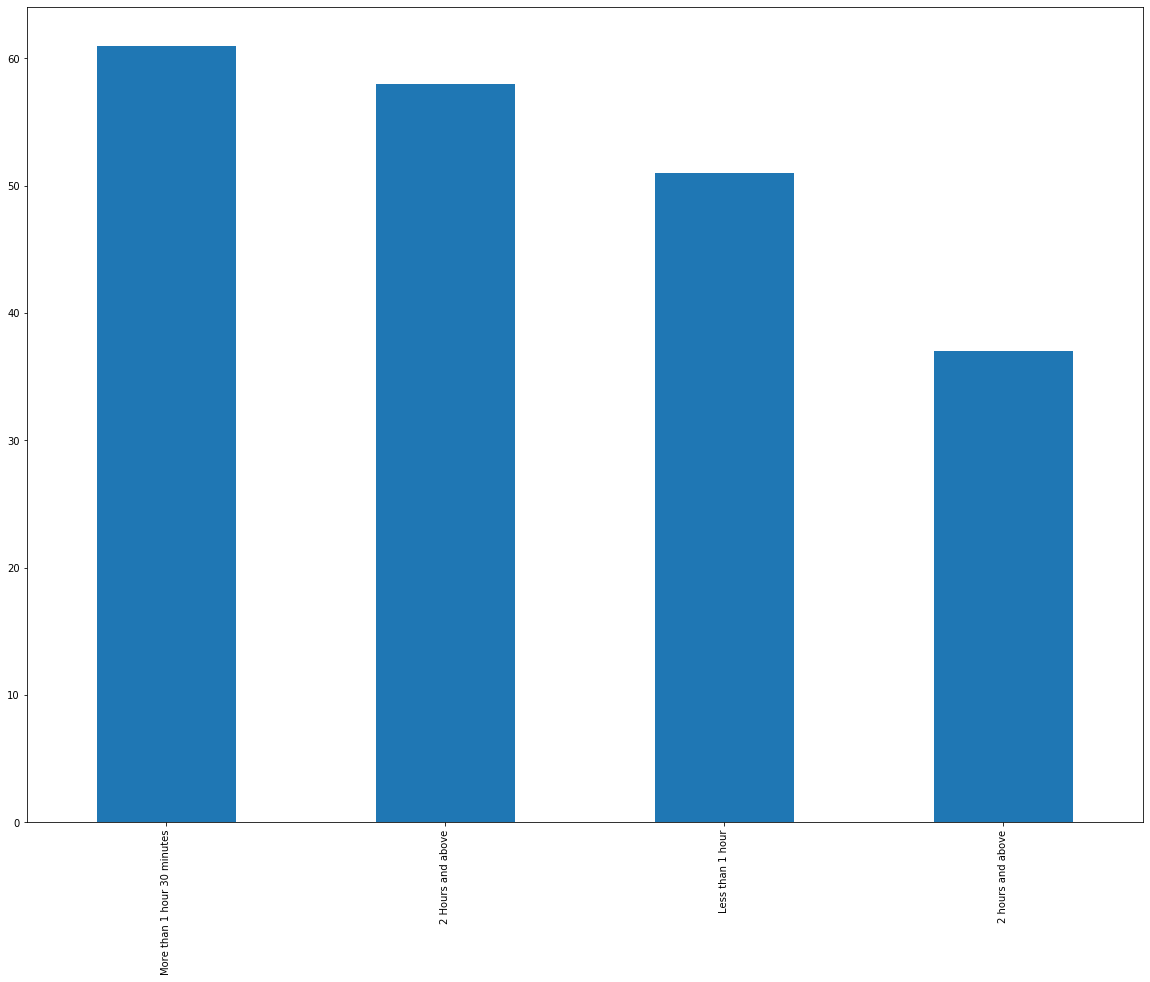

In [191]:
data_set['Time Spent on Social Media'].value_counts().plot(kind = 'bar', figsize=(20,15))

In [197]:
data_set['Gender'].value_counts()

Male      109
Female     98
Name: Gender, dtype: int64

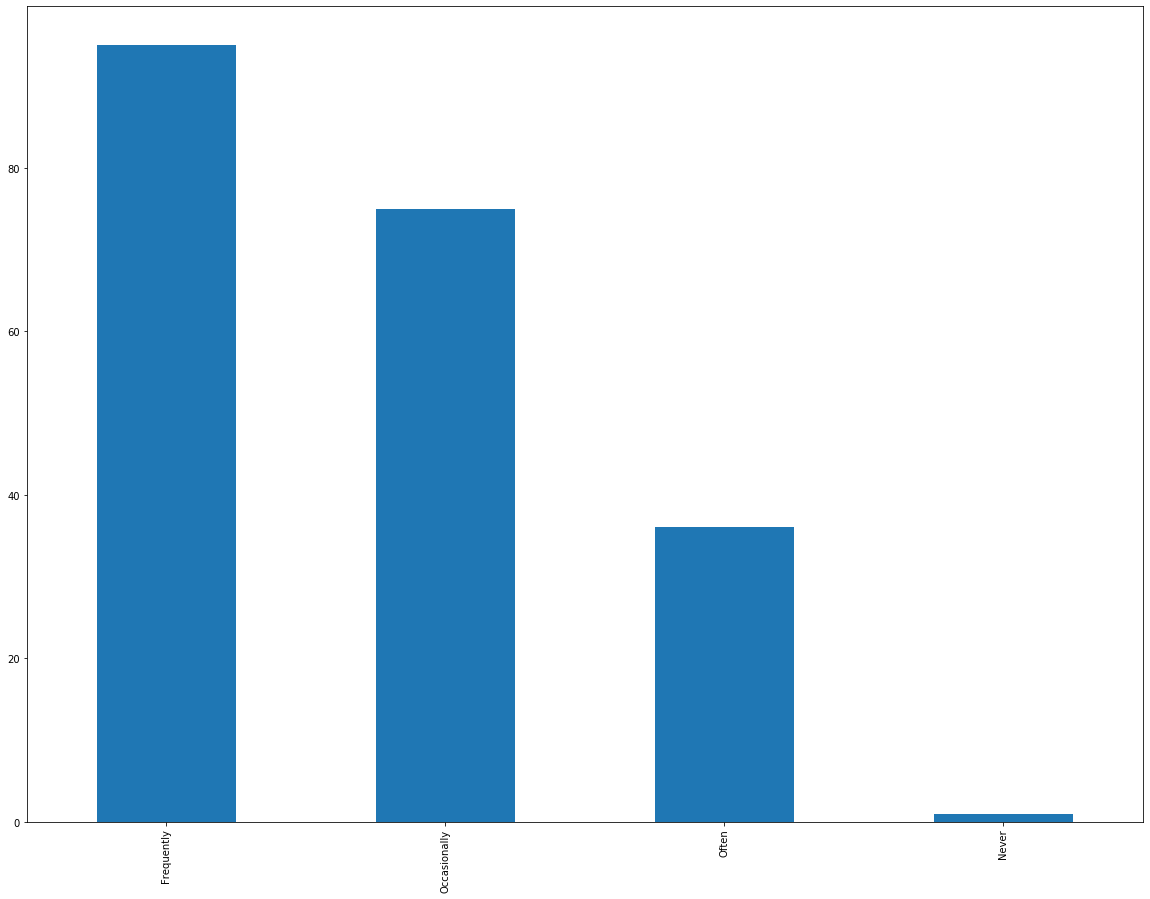

In [198]:
data_set['Logged in Frequency'].value_counts().plot(kind = 'bar', figsize=(20,15))

In [275]:

# function to get the unique values in a given column

def findUnique (data_set,column):
    
    """Returns the unique values in the given column"""
    
    column = data_set[column]
    uniqueValue = column.unique()
    
    return uniqueValue



In [276]:
def VariableCount(data_set,column):
    
    """returns the count of each unique value in a column"""
    
    uniqueValues = findUnique(data_set,column)
    countList = []
    countDict={}
    
    for i in range(len(uniqueValues)):
        
        countVariable = data_set[data_set[column] == uniqueValues[i] ].count()
        countVariable = countVariable[column]
        
        countList.append(countVariable)
        countDict[uniqueValues[i]]=countList[i]
    
    return countDict



In [277]:
cols=data_set.columns

for col in cols:
    col=str(col)
    print(col,":")
    print( '\n', VariableCount(data_set,col),'\n')

In [283]:
def replaceValue(data_set,column):
    
    """converts non-numerical columns to numerical values 
    by assigning number starting from 0, to the unique values of the column"""
    
    uniqueValues=findUnique(data_set,column)
    arrayVal=np.arange(0,len(uniqueValues))
    dic={}
    
    for i in range(0,len(uniqueValues)):
        dic[uniqueValues[i]]=i 
    newval=data_set[column].replace( dic)
    return newval



#applying the replace on data
Columns=data_set.columns
for column in Columns:
    data_set[column]=replaceValue(data_set,column)

In [287]:
"""findng the pearson correlation on the data"""
result=data_set.corr(method='pearson')
result

,Gender,Age Group,Field of Occupation,Social Media Platforms,Time Spent on Social Media,Devices Used,Preferred Medium,Logged in Frequency,Social Media Use in Office,Routine at Work,Importance to Daily Worklife,Addicted to Social Media,Distraction at Work,Activities on Social Media,Impact on Goals,Impact on general Output
Gender,1.000000,0.008705,0.095479,0.193581,0.024682,0.213743,-0.040423,-0.036289,0.084316,0.029169,0.026693,-0.008423,-0.122688,0.019718,-0.022286,0.103172
Age Group,0.008705,1.000000,0.088119,0.030637,-0.054452,0.043582,0.047484,-0.148473,0.078633,-0.055356,0.021919,0.055498,0.045453,0.099349,-0.037006,-0.007314
Field of Occupation,0.095479,0.088119,1.000000,-0.154153,-0.202835,-0.019583,-0.147715,-0.031118,0.151710,-0.077521,0.061632,0.073739,-0.126381,-0.018118,-0.099814,-0.061506
Social Media Platforms,0.193581,0.030637,-0.154153,1.000000,0.108550,0.085215,0.057305,0.007547,0.145459,0.055403,0.006882,-0.095702,-0.089149,-0.025133,0.035218,-0.091571
Time Spent on Social Media,0.024682,-0.054452,-0.202835,0.108550,1.000000,0.186129,0.280660,0.353863,-0.053382,0.028295,0.046292,0.067149,0.029043,0.033800,-0.022863,-0.028675
Devices Used,0.213743,0.043582,-0.019583,0.085215,0.186129,1.000000,0.028835,-0.077619,0.004551,0.044252,-0.002492,0.033775,0.027396,0.001679,-0.060264,-0.022186
Preferred Medium,-0.040423,0.047484,-0.147715,0.057305,0.280660,0.028835,1.000000,0.084321,-0.109956,0.150058,0.038089,-0.006172,-0.039722,0.137263,0.085162,0.035285
Logged in Frequency,-0.036289,-0.148473,-0.031118,0.007547,0.353863,-0.077619,0.084321,1.000000,-0.111960,-0.156503,-0.058542,0.232605,0.081823,0.062318,-0.081502,-0.040475
Social Media Use in Office,0.084316,0.078633,0.151710,0.145459,-0.053382,0.004551,-0.109956,-0.111960,1.000000,0.166910,-0.042633,-0.012801,-0.176797,-0.109904,-0.012752,0.054419
Routine at Work,0.029169,-0.055356,-0.077521,0.055403,0.028295,0.044252,0.150058,-0.156503,0.166910,1.000000,0.124040,-0.142470,-0.001669,0.013456,0.340039,0.034699


In [280]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    x=data_set[x].values
    y=data_set[y].values
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In [289]:
print("Pearson correlation coefficient between some selected columns: \n")
print('''Social media use in Office and Distraction at Work: {}
        \n\nSocial Media Use in Office and Importance to Daily worklife: {}
        \n\nAddicted to Social Media and Impact on Goals: {}
        \n\nRoutine at Work and Social Media Use in Office {}
        \n\nAddicted to Social Media and Gender:{}     
      '''
.format (pearson_r("Routine at Work","Addicted to Social Media"),
pearson_r("Social Media Use in Office","Distraction at Work"),
pearson_r("Social Media Use in Office","Importance to Daily Worklife"),
pearson_r("Addicted to Social Media","Impact on Goals"),
pearson_r("Routine at Work","Social Media Use in Office"),
pearson_r("Addicted to Social Media","Gender")))

Pearson correlation coefficient between some selected columns: 

Social media use in Office and Distraction at Work: -0.14246999773864238

Social Media Use in Office and Importance to Daily worklife: -0.17679650143878134

Addicted to Social Media and Impact on Goals: -0.0426334683093553

Routine at Work and Gender -0.035306853481626994

Addicted to Social Media and Gender:0.16691005921902846
      
      
